<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zad15_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LogisticRegression

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [3]:
dataset = pd.read_csv('daily-bike-share.csv')
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [5]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [6]:
X = dataset.drop(['rentals'], axis=1).copy()
y = dataset['rentals'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.linear_model import ElasticNet
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('scaler_1', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures(degree=3)),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])


# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline = Pipeline(steps=[('preprocessor', data_preparation),
                                 ('regressor', ElasticNet())])
model_pipeline.fit(X_train, y_train)

from math import sqrt
from sklearn.metrics import mean_squared_error
y_predict_train = model_pipeline.predict(X_train)
y_predict_test = model_pipeline.predict(X_test)
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test))}')

Train RMSE: 468.4605041009411
Test RMSE: 387.4981747406604


To była wersja skrócona., To samo chciałem wykonać na pliku HRData ale nie dało się na skróty i ogólne rodzaj danych tam zawartych nie pozwala na to aby używać pipeline jako szablonu. Teraz będzie wersja długa - jak w module tylko, że z rowerami;)

In [8]:
pd.Series(y).value_counts(normalize=True)

,proportion
rentals,
120,0.005472
968,0.005472
163,0.004104
653,0.004104
123,0.004104
...,...
2521,0.001368
1935,0.001368
783,0.001368


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [10]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']

In [11]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

In [12]:
print('Surowy zbiór danych - zbiór treningowy:')
print(X_train[num_features].isnull().mean())
X_train_trasnformed = num_preparation.fit_transform(X_train[num_features])
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór treningowy')
print(X_train_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór treningowy:
temp         0.0
atemp        0.0
hum          0.0
windspeed    0.0
dtype: float64

Wyjście Pipeline - zbiór treningowy
temp         0.0
atemp        0.0
hum          0.0
windspeed    0.0
dtype: float64


In [13]:
print('Surowy zbiór danych - zbiór testowy:')
print(X_test[num_features].isnull().mean())
X_test_trasnformed = num_preparation.transform(X_test[num_features])
X_test_trasnformed = pd.DataFrame(X_test_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór testowy')
print(X_test_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór testowy:
temp         0.0
atemp        0.0
hum          0.0
windspeed    0.0
dtype: float64

Wyjście Pipeline - zbiór testowy
temp         0.0
atemp        0.0
hum          0.0
windspeed    0.0
dtype: float64


In [14]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)
])

In [15]:
data_preparation.fit_transform(X_train)

array([[0.380833, 0.375621, 0.623333, 0.235067],
       [0.435   , 0.431167, 0.463333, 0.181596],
       [0.5425  , 0.530296, 0.542917, 0.227604],
       ...,
       [0.635   , 0.575158, 0.84875 , 0.148629],
       [0.361739, 0.35967 , 0.476957, 0.222587],
       [0.4125  , 0.417283, 0.819167, 0.250617]])

In [20]:
# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))])
cat_preparation.fit_transform(X_train[cat_features])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [21]:
print(cat_preparation.fit_transform(X_train[cat_features]).shape)

(548, 30)


In [23]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season','mnth','holiday','weekday','workingday','weathersit']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

In [24]:
data_preparation.fit_transform(X_train)

array([[0.380833, 0.375621, 0.623333, ..., 0.      , 1.      , 0.      ],
       [0.435   , 0.431167, 0.463333, ..., 1.      , 0.      , 0.      ],
       [0.5425  , 0.530296, 0.542917, ..., 1.      , 0.      , 0.      ],
       ...,
       [0.635   , 0.575158, 0.84875 , ..., 0.      , 1.      , 0.      ],
       [0.361739, 0.35967 , 0.476957, ..., 1.      , 0.      , 0.      ],
       [0.4125  , 0.417283, 0.819167, ..., 0.      , 1.      , 0.      ]])

In [25]:
data_preparation.fit_transform(X_train).shape

(548, 34)

In [32]:
#REgresja logistyczna  MODEL
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season','mnth','holiday','weekday','workingday','weathersit']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [33]:
model_pipeline_v1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('model', LogisticRegression(max_iter=10000))])

Trening

Metryki, macierz pomyłek, ROC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0
         103       0.00      0.00      0.00       1.0
         109       0.00      0.00      0.00       0.0
         112       0.00      0.00      0.00       1.0
         117       0.00    

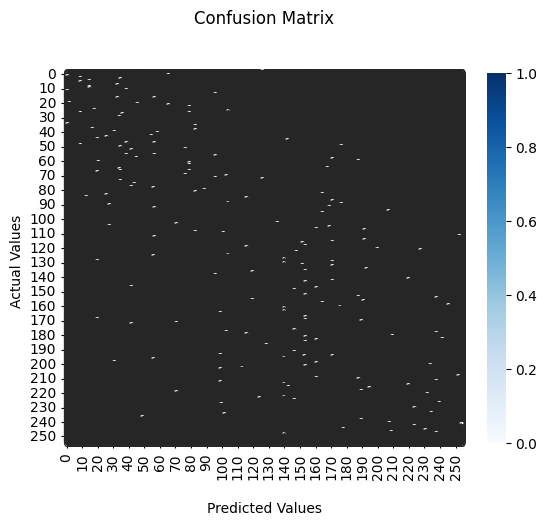

Multi-class problem detected. ROC curve is not applicable.


<ipython-input-38-c2a9e28e2d05>:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.0,None


In [38]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    if len(np.unique(y_checked)) > 2:
        print("Multi-class problem detected. ROC curve is not applicable.")
    else:
    # plot ROC curve
        fig = plt.figure(figsize=(6, 6))
        plt.plot([0, 1], [0, 1], 'k--')
        for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
            fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
            plt.plot(fpr, tpr, label=name_selected)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

    f1_metric = f1_score(y_checked, predictions, average='weighted')

    if len(np.unique(y_checked)) == 2:
        auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    else:
        auc_metric = None  # Or any other suitable value for multi-class


    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


    return metrics_dataframe

calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test)

Powyżej wyszedł mi poprostu KOSMOS. To oznacza, że w takim przypadku źle to zrobiłem lub należałoby rozwiązać to inaczej, czyli wszystkie wartości liczbowe i nie liczbowe zamienić na postać logiczną, utwożyć z tego macierz i na takich wartościach operować.

In [40]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season','mnth','holiday','weekday','workingday','weathersit']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

# przygotowanie wartości kategorycznych
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore'))
])

# transformer = wartości numeryczne oraz kategoryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])
model_pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler_1',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95)),
                                                                  ('scaler_2',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('model', LogisticRegression(max_iter=10000))])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       0.0
          74       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       0.0
          92       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0
         103       0.00      0.00      0.00       1.0
         109       0.00    

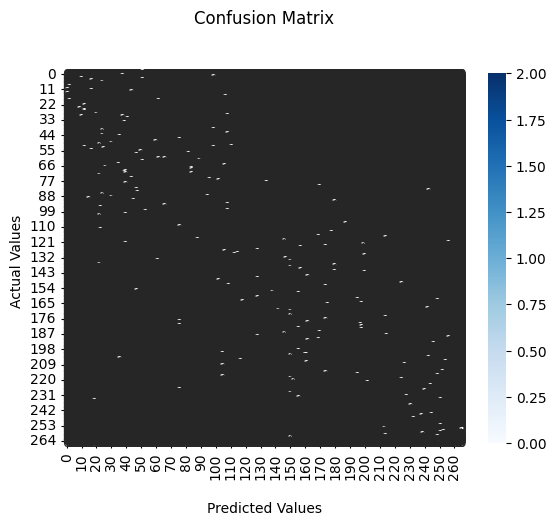

Multi-class problem detected. ROC curve is not applicable.


,Model,F1_score,AUC
0,Logistic Regression,0.0,None
1,Logistic Regression,0.0,None


In [41]:
calculate_metrics(model_pipeline_v2, 'Logistic Regression', X_test, y_test)